# Hass Consult real estate regression analysis and prediction
## Problem statement:
### we have been presented with a housing dataset and been tasked to study the factors that influence housing prices in the market
### we have also been tasked to create a model to predict the sales price of a house based on the given features we have been provided with

## Metric of success:
### 1) To be able to accurately analyse the factors and single out the 3 most important factors that influence housing prices
### 2) To create a model that can pedict housing prices with a 75% accuracy level

## Context
### we will be working as a data scientist for the housing company Hass consult and will try to predict the price of housing based off of the features we have been given.This analysis could be used to inform which types of houses are in demand as well as which features to use whilst planning for new housing projects

#### first step is Importing the libraries we will require and then reading the dataset in a pandas dataframe


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

#### opening the file,printing out the shape of the dataset and the first five columns

In [2]:
house = pd.read_csv('House_data.csv')
print("The dataset's shape is " + str(house.shape)[1:6] + ' rows and ' + str(house.shape)[8:10] + ' columns')
house.head()

The dataset's shape is 21613 rows and 20 columns


id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0         3       1.00         1180      5650     1.0   
1  6414100192  538000.0         3       2.25         2570      7242     2.0   
2  5631500400  180000.0         2       1.00          770     10000     1.0   
3  2487200875  604000.0         4       3.00         1960      5000     1.0   
4  1954400510  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503

#### the dataset contains data on standard housing features including:
#### i) the number of bedrooms and bathrooms 
#### ii) the square footage of the living space and the basement 
#### iii) the grade which I presume is the quality of the housing
#### iv) the number of floors 
#### v) the year it was built 
#### vi) the year of renovation ( a 0 value in the year of renovation means it has never been renovated)
#### vii) the price of the house (obviously)
#### viii) the condition of the house

#### checking the datatypes of different columns

In [3]:
house.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

#### seems like all the columns are numerical columns which would make sense since the entire dataset is made up of mostly quantified elements.The long and lat columns do not seem to offer any use since they are coordinates and we'll not use them in our analysis so we'll drop them

#### the zipcode column can be converted to a categorical datatype which we will do later on during cleaning

#### Time to check for null values

In [4]:
house.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### seems like there are zero null values in the dataset,this is a rather clean dataset

In [5]:
house.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.401822e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.673622e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

#### measures of central tendency seem to indicate there may be outliers in some of the columns e.g in the bedrooms,bathrooms and sqft_living columns, I believe there may be outliers in this column

In [6]:
house.duplicated().sum()

3

#### seems like there are some duplicate columns,we'll have to drop these first before we proceed as they could affect data analysis ahead

In [7]:
house = house.drop_duplicates()

In [8]:
house.duplicated().sum()

0

#### above we dropped the duplicated rows and checked to see if they were dropped

#### next we'll check the unique values in the grade and condition columns to check for consistency in the data

In [9]:
print('the grade column unique values include: '+ str(house.grade.unique()))
print('the condition column unique values include: '+ str(house.condition.unique()))

the grade column unique values include: [ 7  6  8 11  9  5 10 12  4  3 13  1]
the condition column unique values include: [3 5 4 1 2]


#### I have noted that the value '2' is missing in the grade column values which is numbered from 1-13
#### we'll have to drop that column as their is no definition provided for that specific column

#### next we'll run pandas profiling to profile the dataset and generate a report that will guide us in EDA and data cleaning

In [10]:
pandas_profiling.ProfileReport(house)

#### The pandas profiling library shows that this is a relatively clean dataset,but highlights some crucial problems incuding some columns containing majority of their rows as zeros such as the (sqft_basement,view and yr renovated) columns as well as some features that seem to be highly correlated such as the (sqft_living and sqft_living15) columns,we will dropo these columns later on before we start creating the model

## EDA

#### we will perform EDA on the dataset before we remove any outliers to see the distributions and relationships of variables  as they are in the dataset
#### we will then proceed to conduct further EDA after we identify any outliers in and then proceed to drop them to give us a clearer picture of the data without outliers

### univariate analysis

#### In Univariate analysis we'll count the unique values to observe their frequencies and plot out histograms to see distribution of the data  

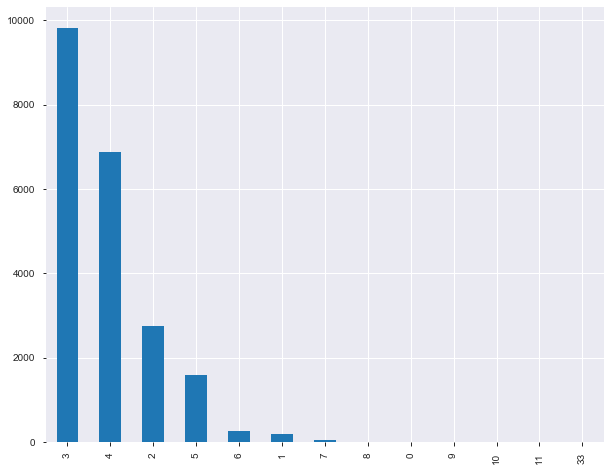

In [11]:
plt.figure(figsize=(10,8))
house['bedrooms'].value_counts().plot.bar()

#### looks like most houses are either 3 or 4 bedroom houses which would imply that most of the houses are suitable for families
#### their is a house with 33 bedrooms on the far right whic appears to be an outlier
#### most housee seem to be between 2-4 bedrooms which would imply that somebody looking to develop housing in this area should develop family friendly housing for either a small or midsize family

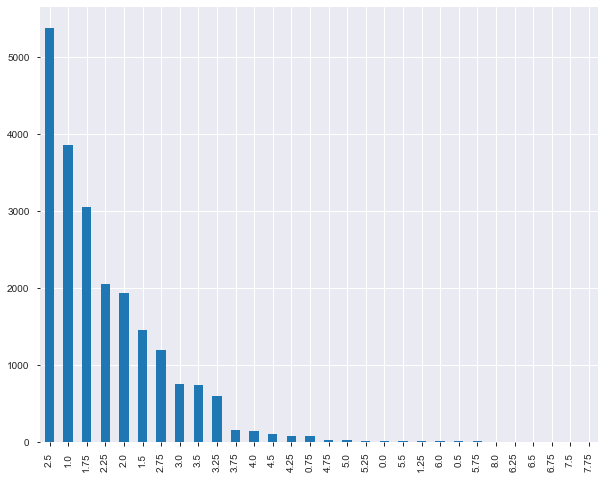

In [12]:
plt.figure(figsize=(10,8))
house['bathrooms'].value_counts().plot.bar()

#### above it most houses seem to have 2.5 or 1 bathroom in them
#### the 2.5 bathrooms seems to match with the earlier count of most houses being 3 bedroom houses implying that these houses contain 2.5 bathrooms instead of 3 bathrooms
#### the second most common bathroom count is 1 which does not match the second most occuring bedroom count which is 4 bedrooms.
#### this could imply that most developers favor number of bedrooms over the number of bathrooms

In [13]:
plt.figure(figsize=(20,10))
house['yr_built'].value_counts()[:20]#.plot.bar()

2014    559
2006    454
2005    450
2004    433
2003    422
2007    417
1977    417
1978    387
1968    381
2008    367
1967    350
1979    343
1959    334
1990    320
1962    312
1954    305
2001    304
1987    294
1989    290
1969    280
Name: yr_built, dtype: int64

<Figure size 1440x720 with 0 Axes>

#### above it seems that most houses were after the year 2000 with the top 6 highest frequency years of construction being after that year
#### there appears to be a slight pattern that emerges with most houses being built either in the 2000's or the 1960's or 1970's,this could indicate periods of increased economic activity that precipitated increased demand for housing
#### infact 15 out of the 20 most frequent years of houses being built occur in those 3 decades only

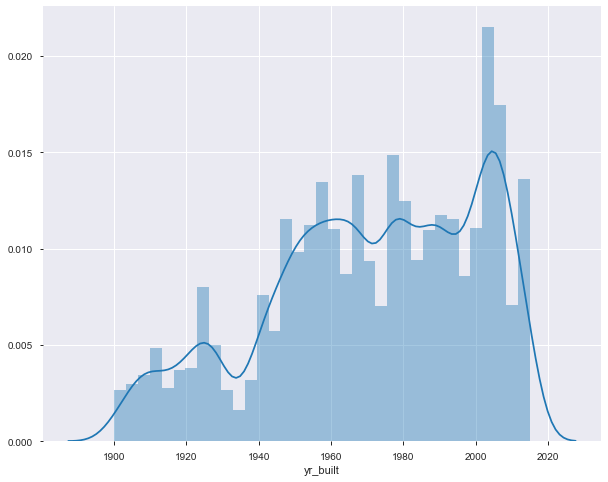

In [14]:
plt.figure(figsize=(10,8))
sns.distplot(house.yr_built)

#### The histogram above seems to confirm the observation I made above,most houses seem to be constructed after the 2000's,with noticeable spikes in the 1960's and 1970's
#### Their is a noticeable peak in the mid 2000's followed by a substantial drop afterwards and a somewhat recovery phase in the 2010's,this data coincides with the economic boom that was experienced in the early 21st century followed by the economic crash of the great recession that dried up funding for real estate development

In [15]:
print('There are ' + str(len(house['zipcode'].unique())) + ' unique zipcodes in the dataset.')
print('***********************************************************')
print('Below are the 10 most occuring zipcodes')
house['zipcode'].value_counts()[:10]

There are 70 unique zipcodes in the dataset.
***********************************************************
Below are the 10 most occuring zipcodes


98103    602
98038    590
98115    583
98052    574
98117    553
98042    548
98034    545
98118    508
98023    499
98006    497
Name: zipcode, dtype: int64

#### there are 70 unique zipcodes in the dataset with the 10 most frequently occuring ones displayed above

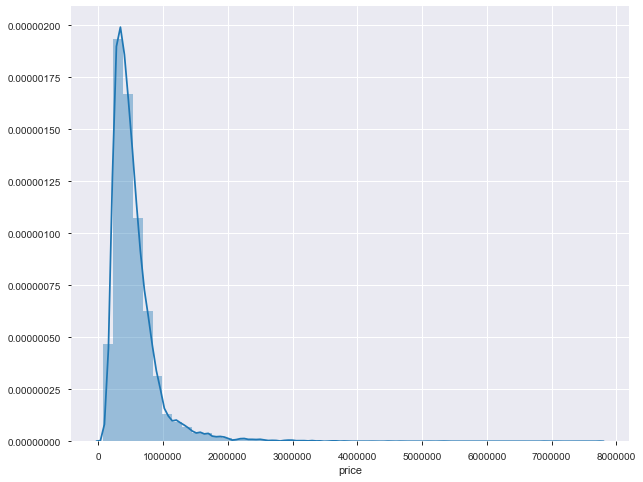

In [16]:
plt.figure(figsize=(10,8))
sns.distplot(house['price'])

#### the histogram above of housing prices indicates that prices of most house are below the 1000000 mark
#### note that the histogram appears skewed to the left primarily because of the outliers that exist in the data 


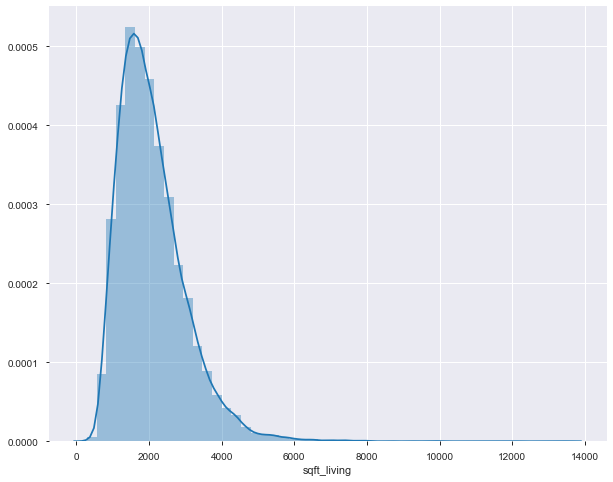

In [17]:
plt.figure(figsize=(10,8))
sns.distplot(house['sqft_living'])

#### most houses contain less than 4000 square feet of living space indicating that they are mostly family houses  with a few having more than 5000 square feet
#### again the data appears skewed to the left due to the outliers that appear in the data

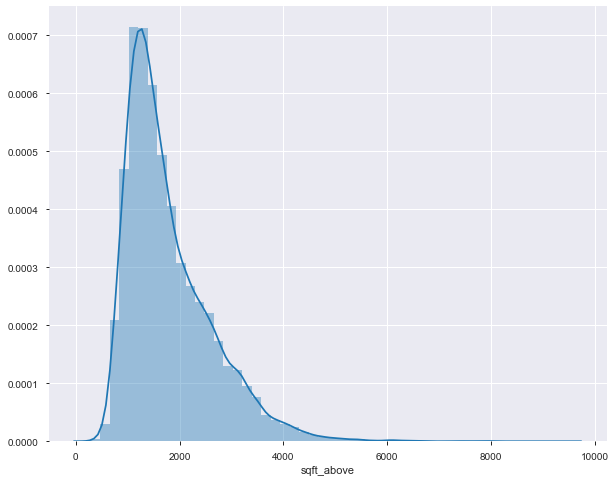

In [18]:
plt.figure(figsize=(10,8))
sns.distplot(house['sqft_above'])

#### squarefoot above data appears to mimic the square foot living data meaning that they could be correlated with each other
#### we will find out below as we test for correlation and collinearity

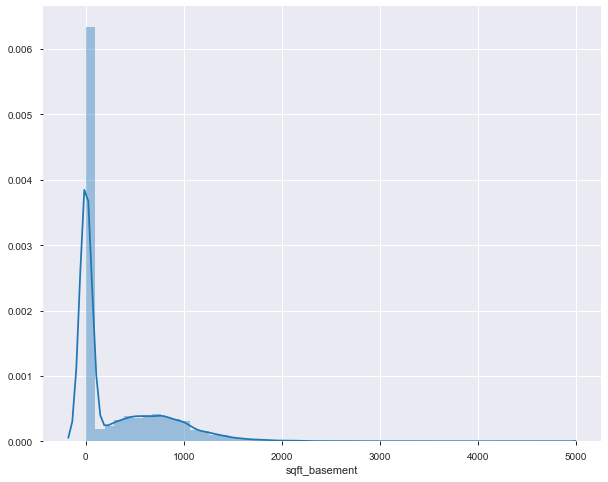

In [19]:
plt.figure(figsize=(10,8))
sns.distplot(house['sqft_basement'])

#### the basement data is highly skewed to the left indicating that most houses do not have basements
#### It also indicates that for the ones that do have basements the size rarely exceeds 1000 square feet
#### this column will be dropped as the high occurrence of zeros will affect the performance of the model

### Bivariate Analysis

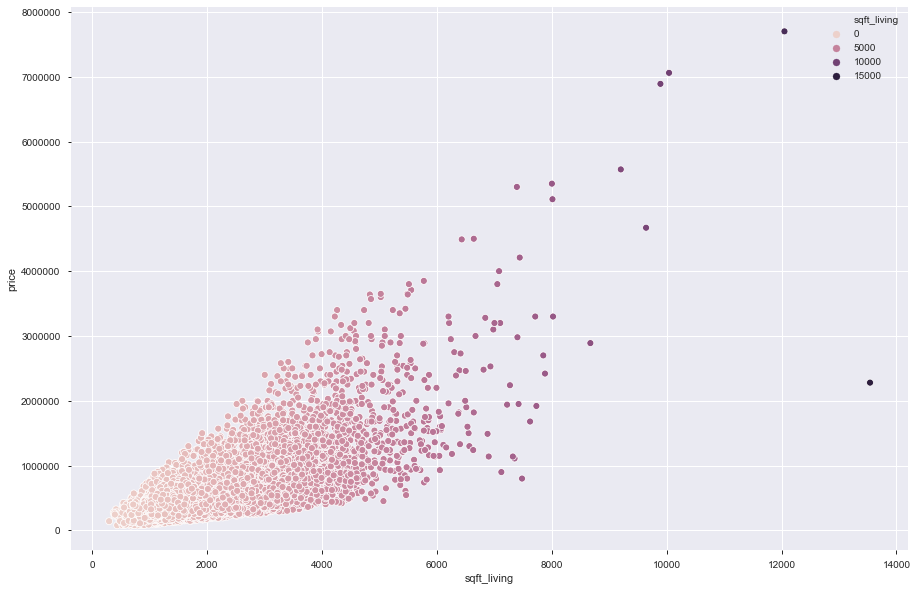

In [20]:
plt.figure(figsize=(15,10))
sns.scatterplot(house['sqft_living'],house['price'],hue=house['sqft_living'])

#### I can see there is a clear linear correlation between the sqft_living and price columns with an increase in sqft correlating with an increase in price

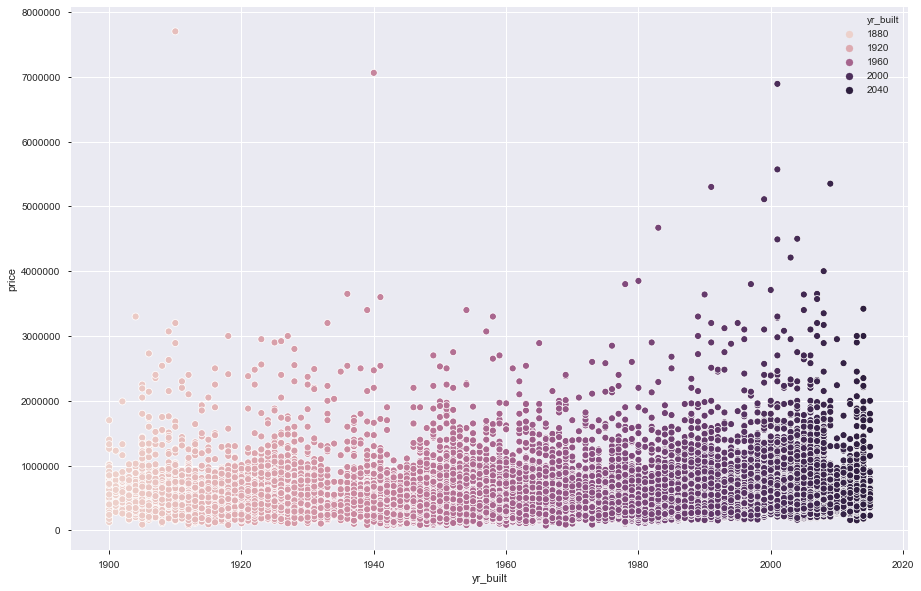

In [21]:
plt.figure(figsize=(15,10))
sns.scatterplot(house['yr_built'],house['price'],hue=house['yr_built'])

#### it seems that most higher priced houses were built from the 1980's onwards with majority of the houses in the dataset being below the 2000000 for majority of the century

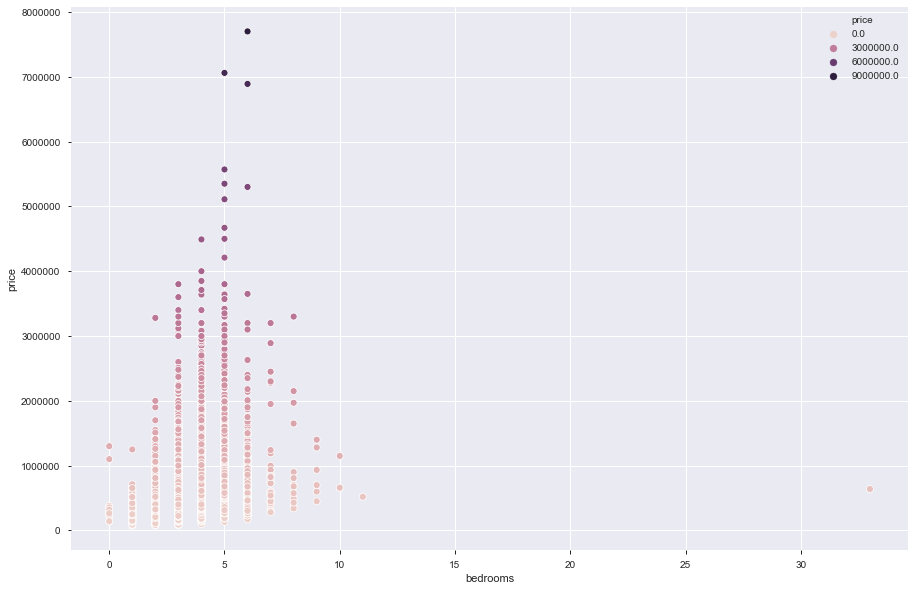

In [22]:
plt.figure(figsize=(15,10))
sns.scatterplot(house['bedrooms'],house['price'],hue=house['price'])

#### the distribution of the price and bedrooms columns is a normal distribution,with the highest priced houses being the 5 and 6 bedroom houses,the prices continue treding downwards as the number of bedrooms exceeds 6

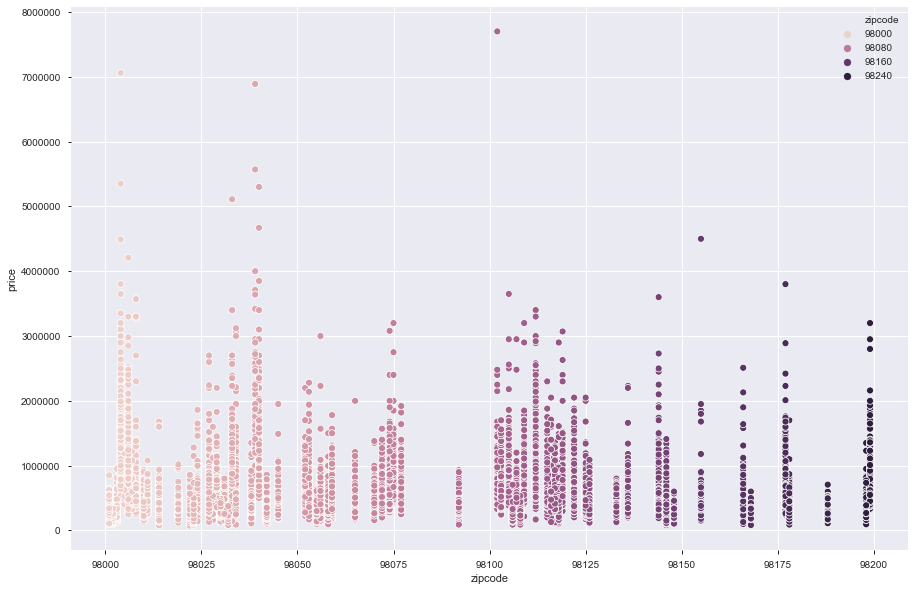

In [23]:
plt.figure(figsize=(15,10))
sns.scatterplot(house['zipcode'],house['price'],hue=house['zipcode'])

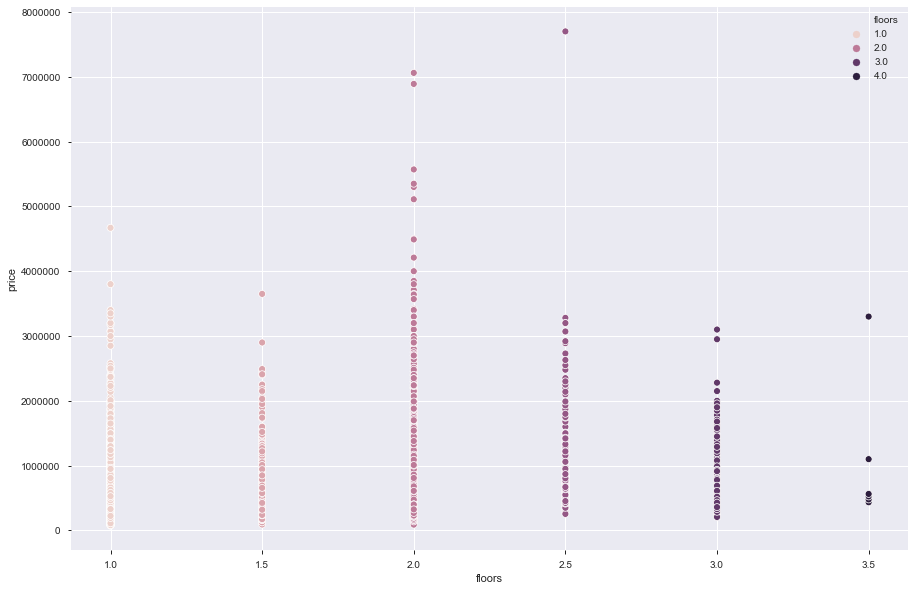

In [24]:

plt.figure(figsize=(15,10))
sns.scatterplot(house['floors'],house['price'],hue=house['floors'])

#### below in the correlation heatmap variables with high correlation have been noted,we will conduct a multicollinearity test later to get a clearer picture of how these variables influence one another

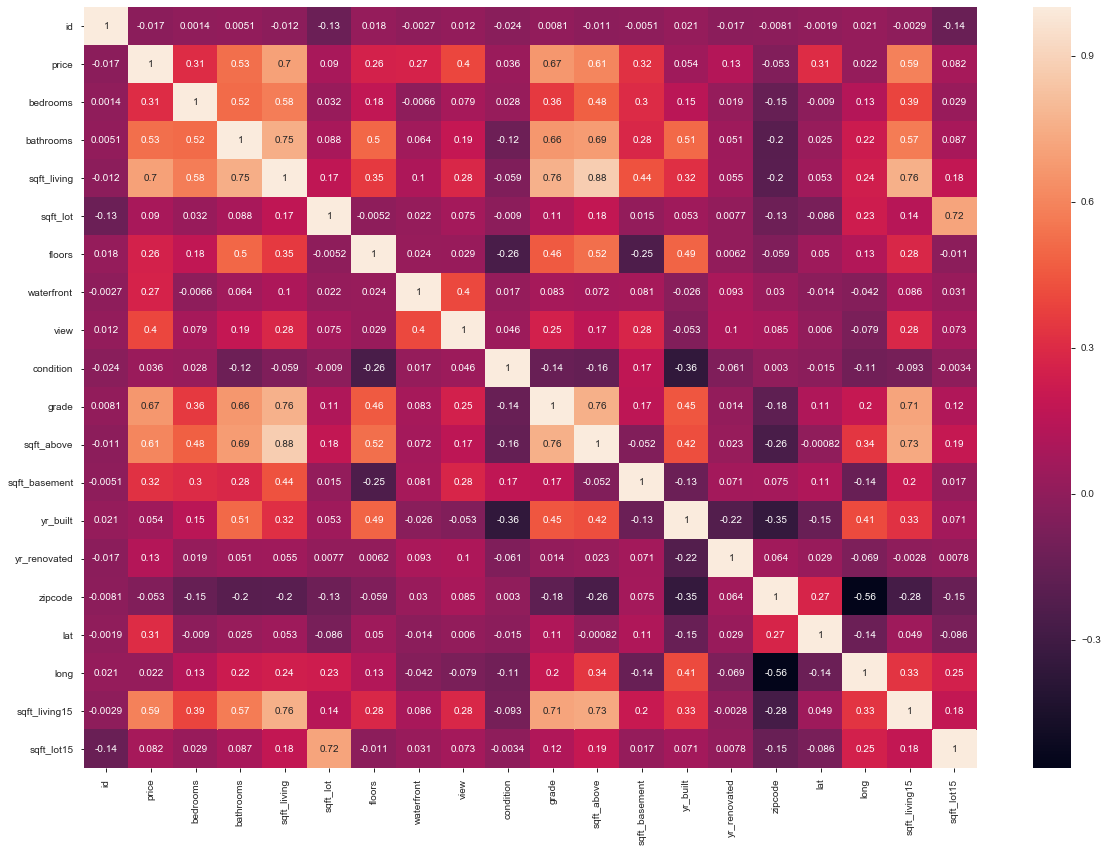

In [72]:
plt.figure(figsize=(20,14))
sns.heatmap(house.corr(),annot= True)

In [26]:
house.head()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0         3       1.00         1180      5650     1.0   
1  6414100192  538000.0         3       2.25         2570      7242     2.0   
2  5631500400  180000.0         2       1.00          770     10000     1.0   
3  2487200875  604000.0         4       3.00         1960      5000     1.0   
4  1954400510  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503

### checking for outliers

#### we will now go ahead and see the outliers that are present in the data and proceed to drop them 
#### we will only be dropping the extreme outliers,those with a standard deviation greater than 3 

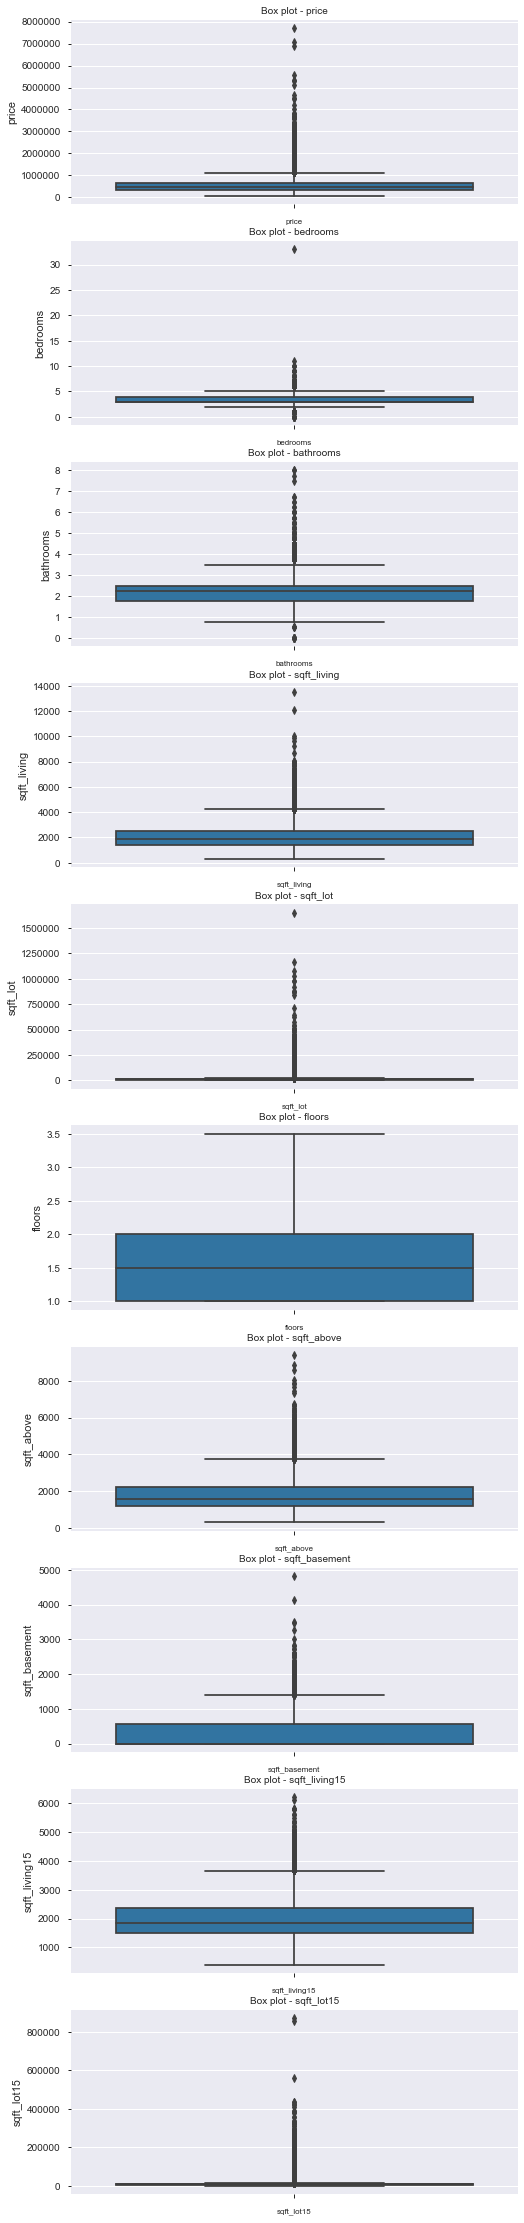

In [27]:
columns=['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
fig, ax = plt.subplots(len(columns), figsize=(8,40))
for i, values in enumerate(columns):
    sns.boxplot(y=house[values], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(values), fontsize=10)
    ax[i].set_xlabel(values, fontsize=8)
plt.show()

#### I have noted the outliers and will now proceed to drop them using the IQR method of removing outliers

In [28]:
q1=house.quantile(0.25)
q3=house.quantile(0.75)
iqr=q3-q1
houseout = house[~((house < (q1 - 1.5 * iqr)) | (house > (q3 + 1.5 * iqr))).any(axis=1)]

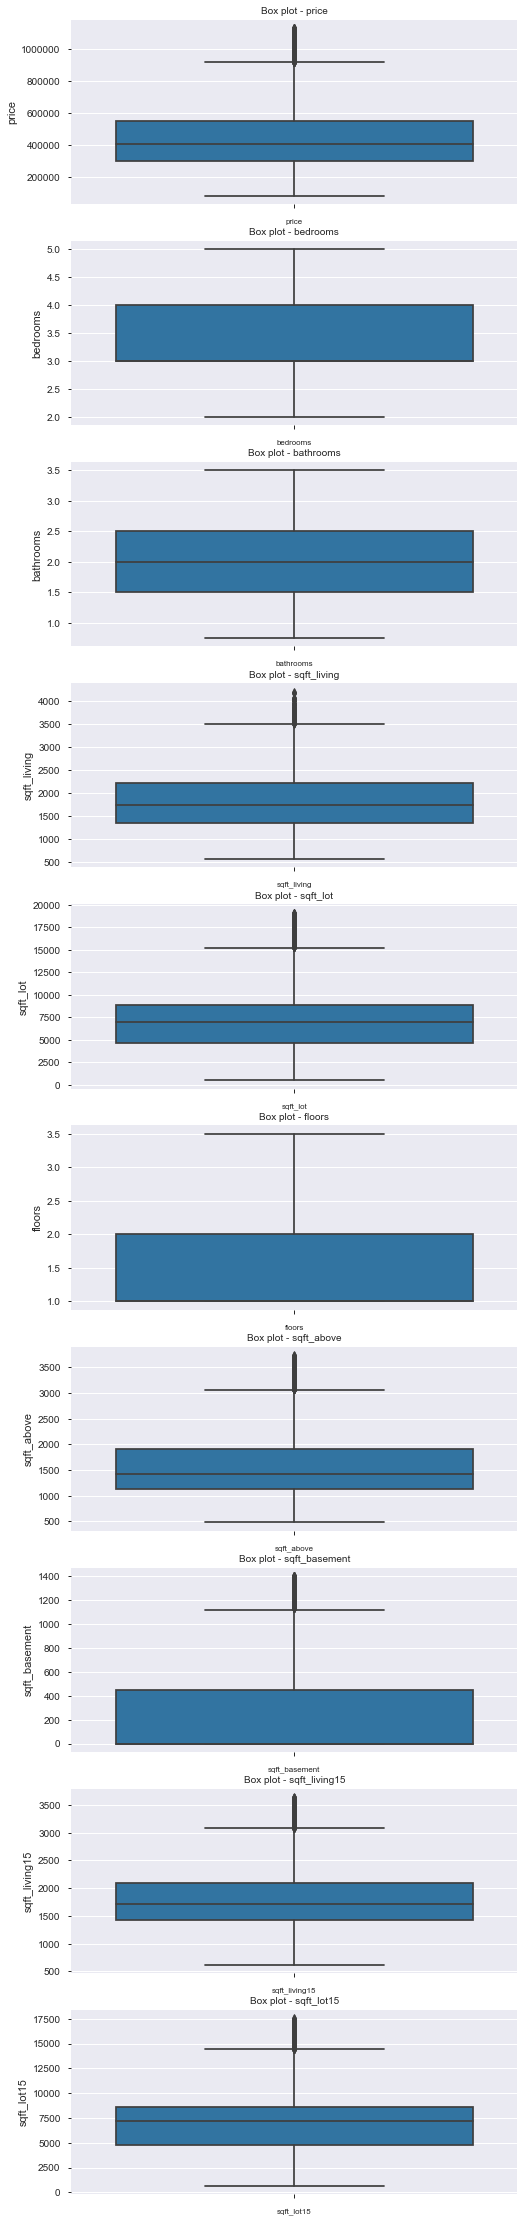

In [29]:
columns=['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
fig, ax = plt.subplots(len(columns), figsize=(8,40))
for i, values in enumerate(columns):
    sns.boxplot(y=houseout[values], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(values), fontsize=10)
    ax[i].set_xlabel(values, fontsize=8)
plt.show()

#### as I can see above most the extreme outliers have been removed 

## EDA part II

#### we will now conduct a second EDA to check how the data has changed after dropping the outliers

In [30]:
houseout.shape

(14935, 20)

#### above we can tell that the outlier removal has eliminated nearly 6000 columns from the dataset

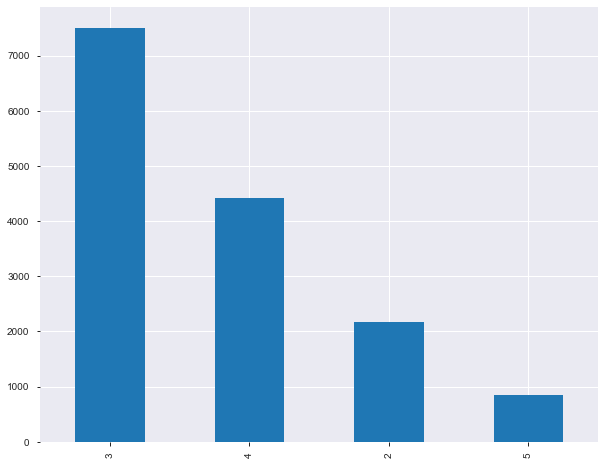

In [31]:
plt.figure(figsize=(10,8))
houseout['bedrooms'].value_counts().plot.bar()

#### houses with bedrooms above 5 bedrooms were dropped from the dataset as they were considered outliers 

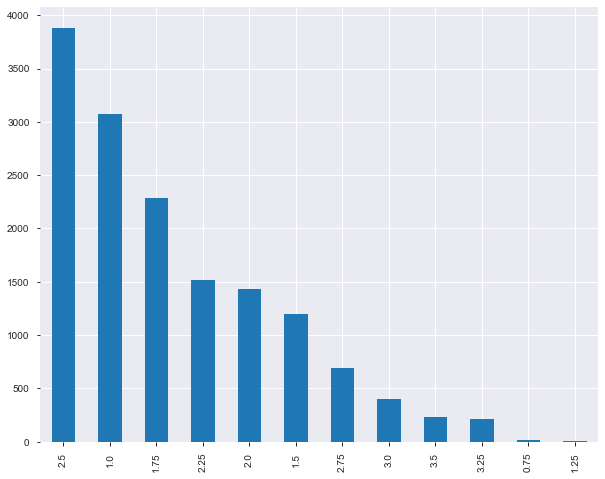

In [32]:
plt.figure(figsize=(10,8))
houseout['bathrooms'].value_counts().plot.bar()

In [33]:
plt.figure(figsize=(20,10))
houseout['yr_built'].value_counts()[:20]#.plot.bar()

2014    434
2005    354
2003    343
2006    333
2004    330
2007    319
1968    290
1977    283
2008    271
1967    267
1959    254
1978    254
1962    232
1954    226
1979    218
1969    216
1955    207
2009    200
2001    195
1987    194
Name: yr_built, dtype: int64

<Figure size 1440x720 with 0 Axes>

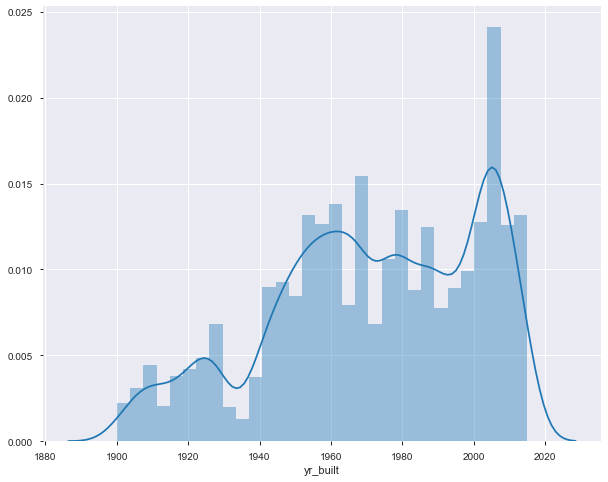

In [34]:
plt.figure(figsize=(10,8))
sns.distplot(houseout.yr_built)

In [35]:
print('There are ' + str(len(houseout['zipcode'].unique())) + ' unique zipcodes in the dataset.')
print('***********************************************************')
print('Below are the 10 most occuring zipcodes after removing outliers in the dataset')
houseout['zipcode'].value_counts()[:10]

There are 69 unique zipcodes in the dataset.
***********************************************************
Below are the 10 most occuring zipcodes after removing outliers in the dataset


98103    496
98038    470
98115    469
98034    457
98117    454
98133    453
98052    450
98023    425
98042    419
98118    395
Name: zipcode, dtype: int64

#### it appears that we dropped an entire zipcode from the dataset,apparently as it was considered an outlier

#### most of the histogram distributions we plotted above have become normal distributions but are primarily skewed to the left indicating most of the values are in the lower end of the spectrum

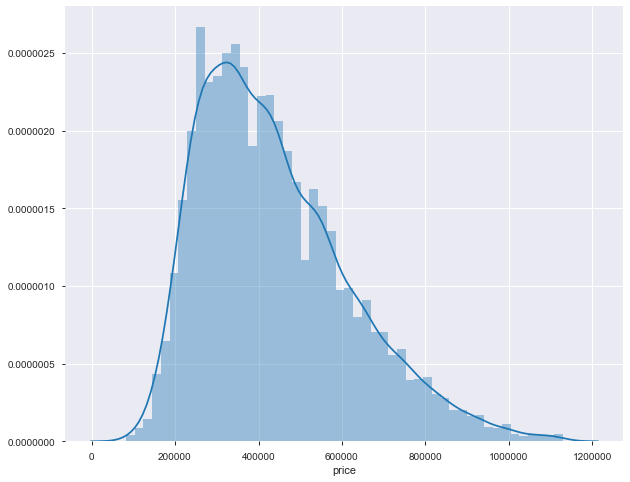

In [36]:
plt.figure(figsize=(10,8))
sns.distplot(houseout['price'])

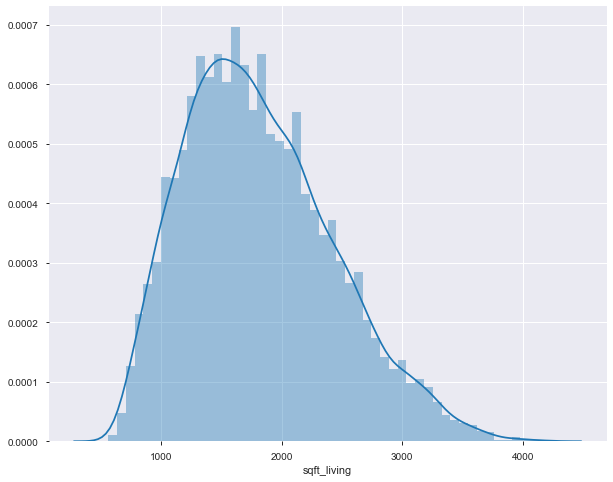

In [37]:
plt.figure(figsize=(10,8))
sns.distplot(houseout['sqft_living'])

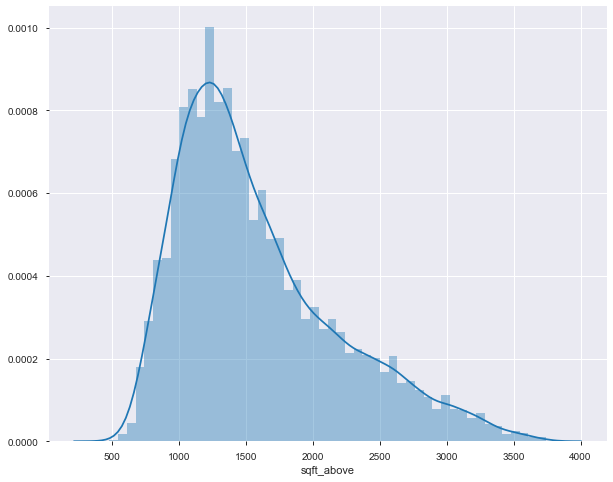

In [38]:
plt.figure(figsize=(10,8))
sns.distplot(houseout['sqft_above'])

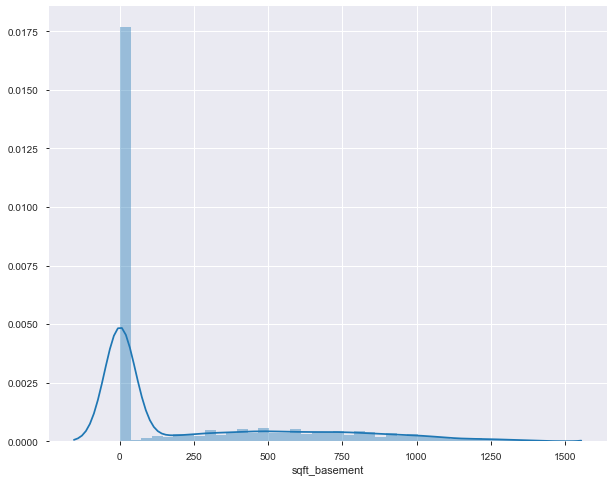

In [39]:
plt.figure(figsize=(10,8))
sns.distplot(houseout['sqft_basement'])

#### the square foot basement distribution is skewed to the left due to the huge number of zero values in the data

### Bivariate Analysis

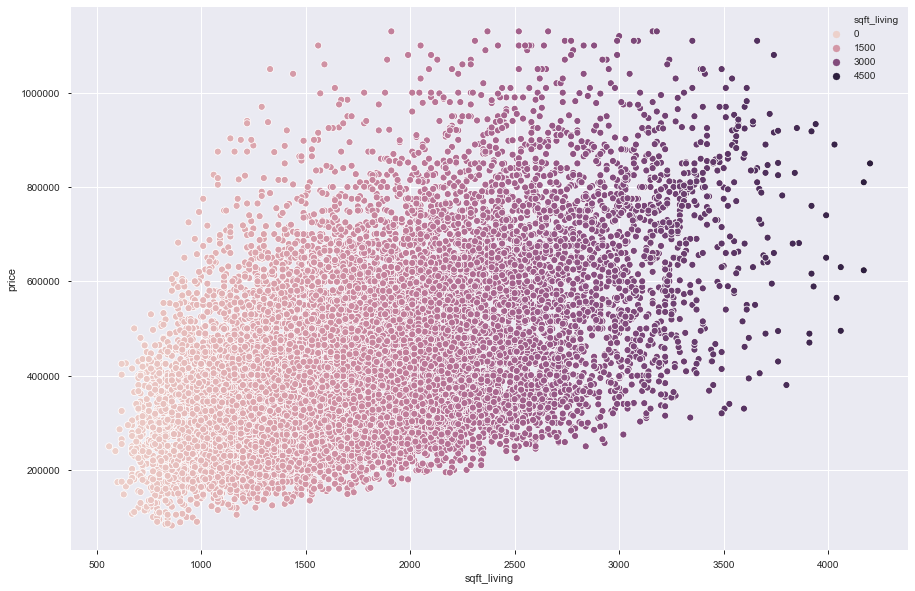

In [40]:
plt.figure(figsize=(15,10))
sns.scatterplot(houseout['sqft_living'],houseout['price'],hue=houseout['sqft_living'])

#### we can see a much clearer correlation between the price and the sqft living after dropping the outliers

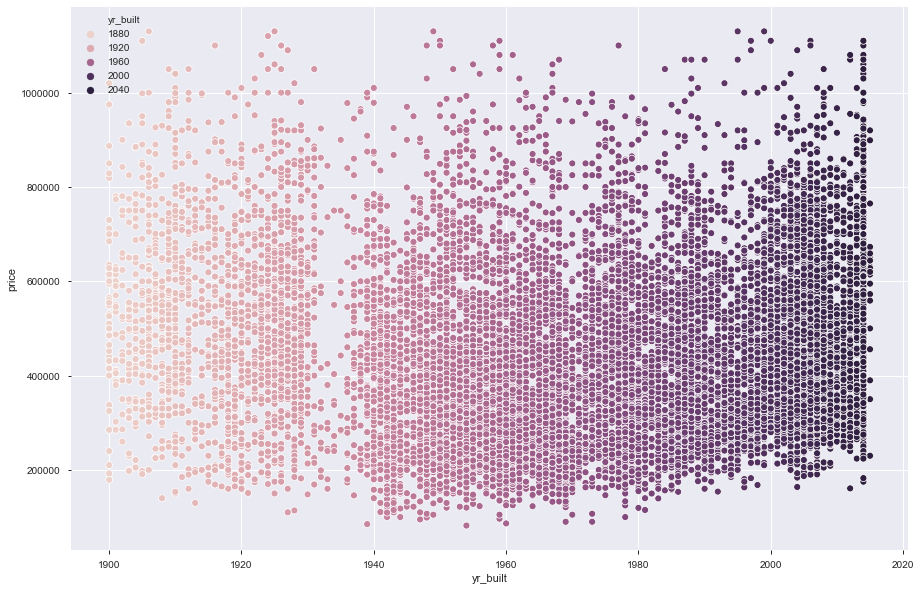

In [41]:
plt.figure(figsize=(15,10))
sns.scatterplot(houseout['yr_built'],houseout['price'],hue=houseout['yr_built'])

#### we can see a clear trend confirming the observations made from the univariate analysis that most houses were constructed after the 1940's

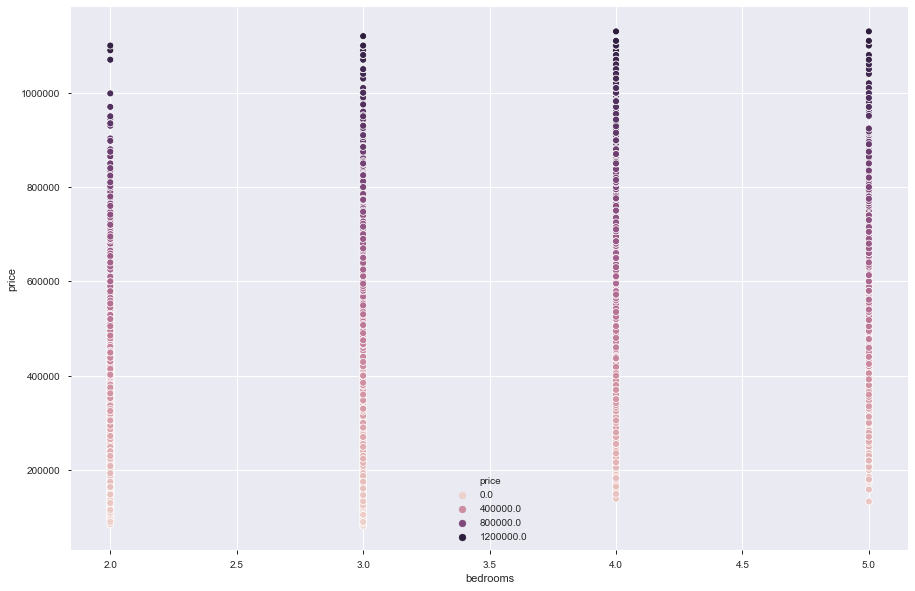

In [42]:
plt.figure(figsize=(15,10))
sns.scatterplot(houseout['bedrooms'],houseout['price'],hue=houseout['price'])

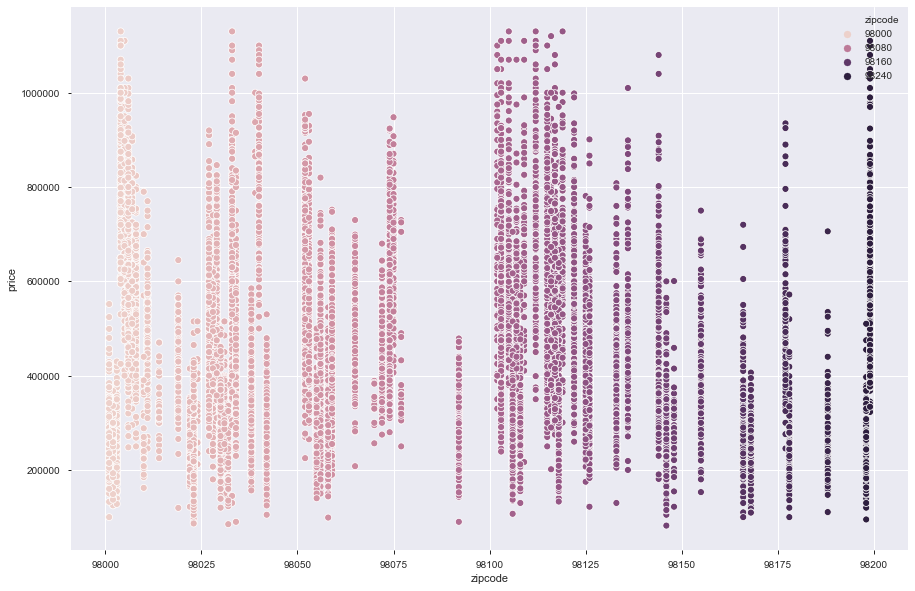

In [43]:
plt.figure(figsize=(15,10))
sns.scatterplot(houseout['zipcode'],houseout['price'],hue=houseout['zipcode'])

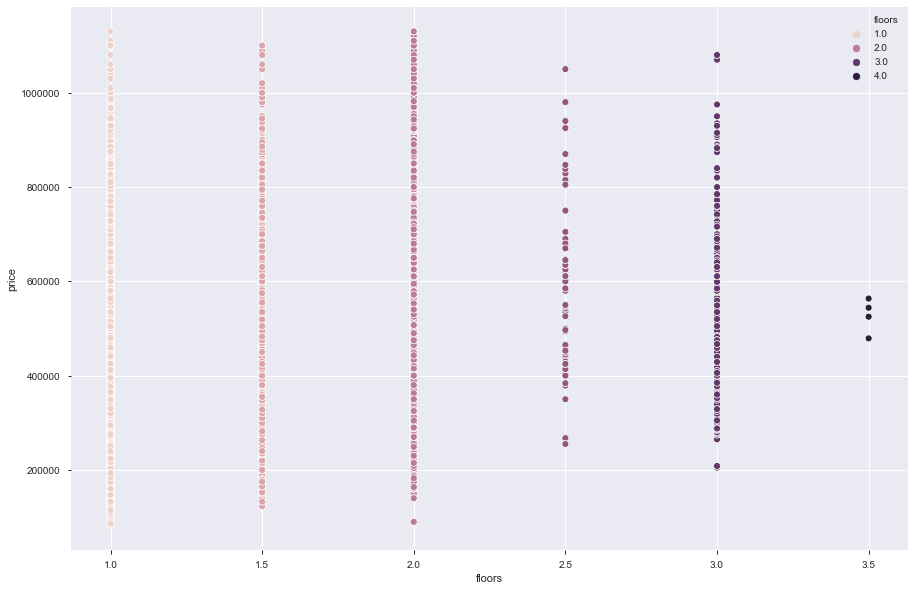

In [44]:
plt.figure(figsize=(15,10))
sns.scatterplot(houseout['floors'],houseout['price'],hue=houseout['floors'])

## Data preparation and modelling

#### I will now normalize the dependent variable

In [190]:
houseout['price'] = np.log(houseout['price'])

## Multiple Linear Regression

#### we will proceed to conduct multilinear regression to try and predict the housing 

In [192]:
houseout.head()

id      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  12.309982         3       1.00         1180      5650     1.0   
2  5631500400  12.100712         2       1.00          770     10000     1.0   
3  2487200875  13.311329         4       3.00         1960      5000     1.0   
4  1954400510  13.142166         3       2.00         1680      8080     1.0   
6  1321400060  12.458775         3       2.25         1715      6819     2.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   
6           0     0          3      7        1715              0      1995   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503  
6             0    98003  47.3097 -122.327           2238        6819

#### we will split the data into x and y variables then further split it into train and test set

In [246]:

x = houseout.iloc[:,2:].values
y = houseout.iloc[:,1:2].values

#### first we will scale the values in x

In [247]:
sc = StandardScaler()
x = sc.fit_transform(x)

#### below we split the data into train and test sets

In [248]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state=0)

#### next we will fit the train sets into the linear regression algorithm 

In [249]:
linregress = LinearRegression()
linregress.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [252]:
features = houseout.iloc[:,2:]
coefficient = linregress.coef_
columns = features.columns

coefdf = pd.DataFrame(coefficient,columns=columns)
coefdf

bedrooms  bathrooms   sqft_living  sqft_lot    floors    waterfront  \
0 -0.012569      0.041  4.743769e+11 -0.021947  0.018781 -1.215858e+10   

           view  condition     grade    sqft_above  sqft_basement  yr_built  \
0 -3.500219e+10   0.038803  0.131394 -4.641581e+11  -2.726741e+11 -0.118344   

   yr_renovated   zipcode       lat      long  sqft_living15  sqft_lot15  
0 -5.250643e+09 -0.027602  0.200578  0.008278       0.060983   -0.038485

#### above we checked for the coefficients of each,I have noted that some features have high coefficients 

#### below now we will run a prediction and check the accuracy of the model using the r2 method

In [253]:
ypred = linregress.predict(xtest)

In [254]:
r2_score(ytest,ypred)

0.6905356890657994

#### the model appears to have achieved a decent accuracy of 69%,lets see if we can improve the model further using other forms of regression below

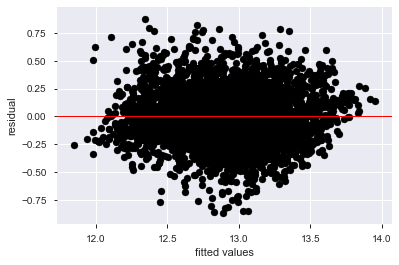

In [257]:
residuals = np.subtract(ypred, ytest)

plt.scatter(ypred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [260]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(ypred.flatten(), residuals.flatten())

degree_of_freedom = len(ypred.flatten())-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

inf


## Quantile Regression

In [265]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size=0.3,random_state=0)

In [266]:
linregress.fit(Xtrain,Ytrain)
Ypred = linregress.predict(Xtest)

In [268]:
mod = smf.quantreg('y ~ x', houseout)
res = mod.fit(q=.5)

print(res.summary())

ValueError: operands could not be broadcast together with shapes (19,) (15,) 

In [269]:
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

for qt in quantiles: 
    res = mod.fit(q = qt )
    models.append(res)
    params.append([qt, res.params['Intercept'], res.params['X']] + res.conf_int().loc['X'].tolist())
    
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)    

ValueError: operands could not be broadcast together with shapes (19,) (15,) 

ValueError: x and y must be the same size

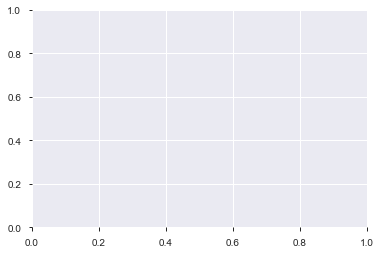

In [270]:
plt.figure(5)
plt.scatter(x, y,  color='black')

y_pred3 = models[0].params['Intercept'] + models[0].params['x'] * x
plt.plot(x, y_pred3, color='red',
         linewidth=3, label='Q Reg : 0.1')

y_pred4 = models[4].params['Intercept'] + models[4].params['x'] * x
plt.plot(x, y_pred4, color='green',
         linewidth=3, label='Q Reg : 0.5')


y_pred5 = models[8].params['Intercept'] + models[8].params['x'] * x
plt.plot(x, y_pred5, color='cyan',
         linewidth=3, label='Q Reg : 0.9')

plt.xticks(())
plt.yticks(())
plt.xlabel("X")
plt.ylabel("Y and predicted Y")
plt.title("Quantile regression on data with non-constant variance")
plt.legend()

## Ridge Regression

In [271]:
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(xtrain,ytrain)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [272]:
pred = ridgeReg.predict(xtest)
pred

array([[12.49373084],
       [12.21171163],
       [12.93260204],
       ...,
       [12.60505709],
       [13.14822735],
       [12.91300949]])

In [273]:
r2_score(ytest,pred)

0.6884528474136613

## Lasso Regression

In [274]:
lasso = Lasso(alpha=0.000001, normalize=True)

In [275]:
lasso.fit(xtrain,ytrain)
pred2 = lasso.predict(xtest)

In [276]:
r2_score(ytest,pred2)

0.6904762163673895

## Elastic Net Regression

In [277]:
Elastic = ElasticNet(alpha=0.0000001, l1_ratio=0.5, normalize=False)

In [278]:
Elastic.fit(xtrain,ytrain)
pred3 = Elastic.predict(xtest)

In [279]:
r2_score(ytest,pred3)

0.6904819546129823